In [1]:
import sys

sys.path.append("/u/li19/diffusers_with_dataloader/examples/audio_generation/audio_gen_files")
from AudiosetDataset import AudiosetDataset
from transformers import CLIPTextModel, CLIPTokenizer
from transformers import AutoTokenizer, T5EncoderModel,T5TokenizerFast

from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt
import json
# device = "cuda"
device = "cpu"

In [2]:

tokenizer = AutoTokenizer.from_pretrained("cvssp/audioldm-m-full", model_max_length=512,  subfolder="tokenizer")
text_encoder = T5EncoderModel.from_pretrained("cvssp/audioldm-m-full", subfolder="text_encoder")

# tokenizer = AutoTokenizer.from_pretrained("t5-large", model_max_length=512)
# text_encoder = T5EncoderModel.from_pretrained("t5-large")


You are using a model of type clap_text_model to instantiate a model of type t5. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at cvssp/audioldm-m-full were not used when initializing T5EncoderModel: ['text_model.encoder.layer.1.output.LayerNorm.weight', 'text_model.encoder.layer.6.attention.output.LayerNorm.weight', 'text_model.encoder.layer.8.output.LayerNorm.weight', 'text_model.encoder.layer.0.attention.self.value.bias', 'text_model.encoder.layer.5.attention.output.dense.weight', 'text_model.encoder.layer.6.attention.self.query.weight', 'text_model.encoder.layer.4.output.LayerNorm.weight', 'text_model.encoder.layer.5.attention.output.LayerNorm.bias', 'text_projection.linear1.bias', 'text_model.encoder.layer.2.intermediate.dense.bias', 'text_model.encoder.layer.8.attention.self.value.weight', 'text_model.encoder.layer.9.output.LayerNorm.weight', 'text_model.encoder.layer.5.attention.self.value.weight', 'text_model.e

In [3]:
dataset_json_file = "/u/li19/data_folder/AudioTaggingDoneRight/egs/audioset/data/datafiles/delta_bal_alpaca_train.json"

bal_audio_conf = "/u/li19/diffusers_with_dataloader/examples/audio_generation/audio_gen_files/audio_conf_latents-tmp.json"
with open(bal_audio_conf, "r") as f:
    audio_set_data_file = json.load(f)
latent_folder = "/u/li19/data_folder/AudioTaggingDoneRight/egs/audioset/data/datafiles/bal_latent_raw"
wav_folder = "/u/li19/data_folder/audioSetAudio/balance_wav"
batch_size = 10
sampler=None
num_workers = 1

In [4]:
dataset = AudiosetDataset(
    audio_set_data_file, 
    latent_folder=latent_folder, 
    tokenizer=tokenizer, 
    device=device, 
    wav_folder=wav_folder,
    dtype=torch.float32,
    channels=1,
)

dataloader = torch.utils.data.DataLoader(dataset, batch_size = batch_size, num_workers=num_workers)

In [22]:
for step, batch in enumerate(dataloader):
    if step > 0:
        break
    print(batch['latent'].shape)
    # print(batch)
    print(batch['input_ids'].shape)
    print(len(batch['caption']))
    label = batch['caption'][0]
    encoder_hidden_states = text_encoder(batch["input_ids"])[0]
    input_ids = []
    input_ids = tokenizer(
        [label], max_length=tokenizer.model_max_length, padding="max_length", truncation=True, return_tensors="pt"
    )
    input_ids = input_ids.input_ids[0]
    print(input_ids)
    print('tokens: ', batch['input_ids'][0])
    print(encoder_hidden_states.shape)
    # print(encoder_hidden_states)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
torch.Size([10, 1, 8, 504])
torch.Size([10, 512])
10
tensor([   0,   83,  621,   16, 2686,  150,   89,   16,   10, 7337,  821, 3810,
           9,  935,    4, 1437,    2,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,  

In [ ]:

train_dataloader = torch.utils.data.DataLoader( 
        AudiosetDataset(data, tokenizer=tokenizer, device=accelerator.device, dtype=weight_dtype, logger=logger, channels=1),
        batch_size=args.train_batch_size, sampler=sampler, num_workers=args.dataloader_num_workers, shuffle=True)


In [2]:
model_path = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_path, device_map=None, safety_checker=None)
pipe.to(device)



/u/li19/data_folder/anaconda3/envs/diffuse/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.15.1",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [3]:
dataset_json_file = "/u/li19/data_folder/AudioTaggingDoneRight/egs/audioset/data/datafiles/delta_bal_alpaca_train.json"
latent_folder = "/u/li19/data_folder/AudioTaggingDoneRight/egs/audioset/data/datafiles/bal_latent_raw"
wav_folder = "/u/li19/data_folder/audioSetAudio/balance_wav"
tokenizer = CLIPTokenizer.from_pretrained(
"CompVis/stable-diffusion-v1-4", subfolder="tokenizer"
    )

dataset = AudiosetDataset(
    dataset_json_file, 
    latent_folder=latent_folder, 
    tokenizer=tokenizer, 
    device=device, 
    wav_folder=wav_folder,
    dtype=torch.float32,
    channels=4
)

dataloader = torch.utils.data.DataLoader(dataset)

In [4]:
sample = dataset[0]
latent = sample["latent"]
print(latent.shape)

torch.Size([4, 8, 504])


In [5]:
n = 6

og_noise = torch.randn([n, 1, 8, 504]).to(device)

noise = torch.randn((n, 8, 21, 24)).to(device)

t_steps= torch.randn([n]).to(device)

fake_embeds = torch.randn([n, 77, 768]).to(device)



print(og_noise.shape)
print(noise.shape)
print(t_steps.shape)
print(fake_embeds.shape)

torch.Size([6, 1, 8, 504])
torch.Size([6, 8, 21, 24])
torch.Size([6])
torch.Size([6, 77, 768])


In [7]:
#Testing if our reshape works in the unet


og_recon = pipe.unet(og_noise, t_steps, fake_embeds).sample
og_recon.shape

INPUT: torch.Size([6, 1, 8, 504])
PRE_FIRST_CONV: torch.Size([6, 8, 21, 24])
POST_FIRST_CONV: torch.Size([6, 320, 21, 24])
DOWN:  torch.Size([6, 320, 11, 12])
DOWN:  torch.Size([6, 640, 6, 6])
DOWN:  torch.Size([6, 1280, 3, 3])
DOWN:  torch.Size([6, 1280, 3, 3])
MID:  torch.Size([6, 1280, 3, 3])
UP:  torch.Size([6, 1280, 6, 6])
UP:  torch.Size([6, 1280, 11, 12])
UP:  torch.Size([6, 640, 21, 24])
UP:  torch.Size([6, 320, 21, 24])


torch.Size([6, 1, 8, 504])

In [6]:
new_conv = torch.nn.Conv2d(8, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)).to(device)

conv_out_kernel = 3
conv_out_padding = (conv_out_kernel - 1) // 2
new_conv_out = torch.nn.Conv2d(320, 8, kernel_size=conv_out_kernel, padding=conv_out_padding).to(device)

pipe.unet.conv_in = new_conv
pipe.unet.conv_out = new_conv_out

In [8]:
new_recon = pipe.unet(noise, t_steps, fake_embeds)

PRE_FIRST_CONV: torch.Size([6, 8, 21, 24])
POST_FIRST_CONV: torch.Size([6, 320, 21, 24])
DOWN:  torch.Size([6, 320, 11, 12])
DOWN:  torch.Size([6, 640, 6, 6])
DOWN:  torch.Size([6, 1280, 3, 3])
DOWN:  torch.Size([6, 1280, 3, 3])
MID:  torch.Size([6, 1280, 3, 3])
UP:  torch.Size([6, 1280, 6, 6])
UP:  torch.Size([6, 1280, 11, 12])
UP:  torch.Size([6, 640, 21, 24])
UP:  torch.Size([6, 320, 21, 24])
OUT:  torch.Size([6, 8, 21, 24])


In [13]:
def copy_weights(source, dest, channel=1):
    # Get the weights and biases from the smaller convolutional layer
    source_weights = source.state_dict()['weight']
    source_biases = source.state_dict()['bias']

    dest_weights = dest.state_dict()['weight']
    dest_biases = dest.state_dict()['bias']
    
    # Here, we duplicate the weights along the input channels dimension
    dest_weights_new = torch.cat((source_weights, source_weights), dim=channel)
    if (channel != 1):
        dest_bias_new = torch.cat((source_biases, source_biases))
    else:
        dest_bias_new = source_biases
    
    print("BIAS - FROM: ", source_biases.shape, "TO: ", dest_biases.shape)
    print("FROM: ", source_weights.shape, "TO: ", dest_weights.shape, "WITH: ", dest_weights_new.shape)
    
    
    dest.load_state_dict({'weight': dest_weights_new, 'bias': dest_bias_new})
    return dest

model_path = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_path, device_map=None, safety_checker=None)


small_conv_in = pipe.unet.conv_in
large_conv_in = torch.nn.Conv2d(8, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


small_conv_out = pipe.unet.conv_out

conv_out_kernel = 3
conv_out_padding = (conv_out_kernel - 1) // 2
large_conv_out = torch.nn.Conv2d(320, 8, kernel_size=conv_out_kernel, padding=conv_out_padding)

large_conv_in = copy_weights(small_conv_in, large_conv_in)
large_conv_out = copy_weights(small_conv_out, large_conv_out, 0)

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


BIAS - FROM:  torch.Size([320]) TO:  torch.Size([320])
FROM:  torch.Size([320, 4, 3, 3]) TO:  torch.Size([320, 8, 3, 3]) WITH:  torch.Size([320, 8, 3, 3])
BIAS - FROM:  torch.Size([4]) TO:  torch.Size([8])
FROM:  torch.Size([4, 320, 3, 3]) TO:  torch.Size([8, 320, 3, 3]) WITH:  torch.Size([8, 320, 3, 3])


In [14]:
pipe.unet.conv_in = large_conv_in
pipe.unet.conv_out = large_conv_out

In [16]:
pipe.save_pretrained("/u/li19/data_folder/model_cache/audio_journey")

In [4]:
model_path = "/u/li19/data_folder/model_cache/audio_journey"
pipe = StableDiffusionPipeline.from_pretrained(model_path, device_map=None, safety_checker=None)
pipe.to("cuda")


You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.15.1",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [5]:
gen = pipe(prompt="idk whatever it does not matter", width=504, height=8, num_inference_steps=400, output_type="latent").images[0]

  0%|          | 0/400 [00:00<?, ?it/s]

torch.Size([1, 8, 504])


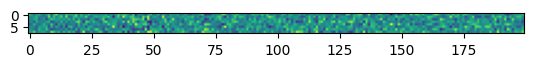

In [11]:
print(gen.shape)

plt.imshow(gen[0, :, :200].cpu().numpy())

In [20]:
# Get the weights and biases from the smaller convolutional layer
small_weights = small_conv.state_dict()['weight']
small_biases = small_conv.state_dict()['bias']

large_weights = large_conv.state_dict()['weight']
large_biases = large_conv.state_dict()['bias']


print(f'SMALL - weights: {small_weights.shape}, biases: {small_biases.shape}')

print(f'LARGE - weights: {large_weights.shape}, biases: {large_biases.shape}')

SMALL - weights: torch.Size([320, 4, 3, 3]), biases: torch.Size([320])
LARGE - weights: torch.Size([320, 8, 3, 3]), biases: torch.Size([320])


In [21]:


# Modify the weights to match the shape of the larger convolutional layer
# Here, we duplicate the weights along the input channels dimension
large_weights_new = torch.cat((small_weights, small_weights), dim=1)
large_weights_new.shape

torch.Size([320, 8, 3, 3])

In [ ]:

# Load the modified weights and biases into the larger convolutional layer
large_conv.load_state_dict({'weight': large_weights_new, 'bias': small_biases})

In [22]:
rand_in = torch.randn([1, 8, 504])
reshaped = torch.Tensor.view(rand_in, [1, 8, 21, 24])
recon = torch.Tensor.view(reshaped, [1, 8, 504])

In [23]:
print(rand_in.shape)
print(reshaped.shape)
print(recon.shape)

torch.Size([1, 8, 504])
torch.Size([1, 8, 21, 24])
torch.Size([1, 8, 504])


In [25]:
torch.all(rand_in.eq(recon))

tensor(True)